# Linear Regression exercise - Advertising

## Importing libraries

In [346]:
import pandas as pd
import numpy as np
import math

## Showing dataset

In [347]:
data = pd.read_csv('Advertising.csv')
data.head()

,index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## First plots of the dataset

array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

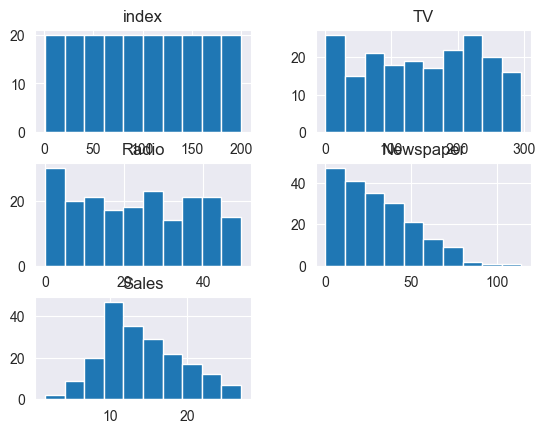

In [348]:
data.hist()

In [349]:
from matplotlib import pyplot as plt

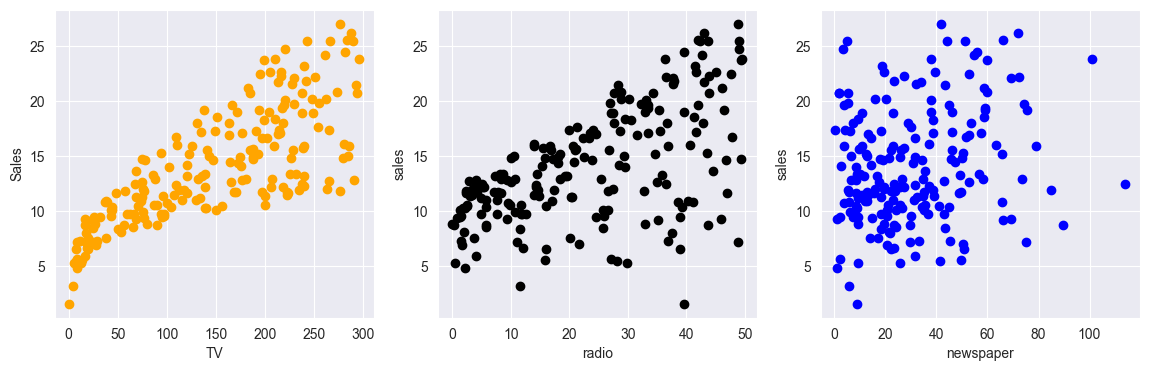

In [350]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.scatter(data['TV'], data['Sales'], color='orange')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1,3,2)
plt.scatter(data['Radio'], data['Sales'], color = 'black')
plt.xlabel('radio')
plt.ylabel('sales')

plt.subplot(1,3,3)
plt.scatter(data['Newspaper'], data['Sales'], color = 'blue')
plt.xlabel('newspaper')
plt.ylabel('sales')


plt.show()

## Finding the relationship between the variables

1. Covariance

Manual process:

In [351]:
def covarianza(x,y):
    cov = 0
    for i in range(len(y)):
        cov += (x[i]-np.mean(x))*(y[i]-np.mean(y))
    cov = cov/len(y)
    return cov

print("Covarianza tv: ", covarianza(data['TV'],data['Sales']))
print("Covarianza Radio",covarianza(data['Radio'],data['Sales']))
print("Covarianza Newspaper: ",covarianza(data['Newspaper'],data['Sales']))

Covarianza tv:  348.6382437499999
Covarianza Radio 44.412509999999976
Covarianza Newspaper:  25.811684999999997


Using a function of python:

In [352]:
data.cov()

,index,TV,Radio,Newspaper,Sales
index,3350.000000,88.027387,-95.110050,-195.311558,-15.587186
TV,88.027387,7370.949893,69.862492,105.919452,350.390195
Radio,-95.110050,69.862492,220.427743,114.496979,44.635688
Newspaper,-195.311558,105.919452,114.496979,474.308326,25.941392
Sales,-15.587186,350.390195,44.635688,25.941392,27.221853


2. Pearson correlation

Manual process:

In [353]:
def correlacion_Pearson(X, Y):
  return covarianza(X, Y) / math.sqrt(covarianza(X, X) * covarianza(Y, Y))

colnames = ['TV', 'Radio', 'Newspaper']

for col in colnames:
  print(correlacion_Pearson(data[col], data['Sales']))

0.7822244248616061
0.576222574571055
0.22829902637616528


Using a function of python:

In [354]:
colnames = ['TV', 'Radio', 'Newspaper', 'Sales']
print(data[colnames].corr())

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


Plot of the Pearson correlation of all the variables of each other

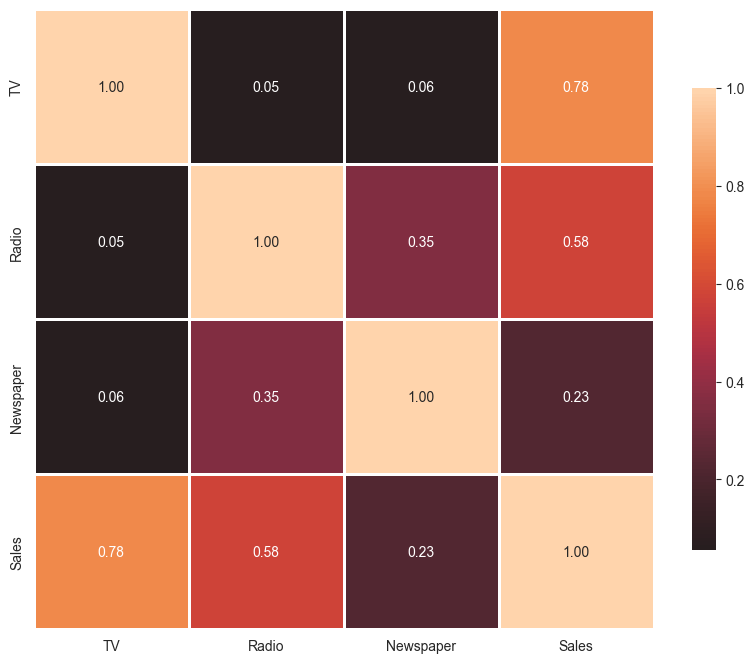

In [355]:
import seaborn as sns

def mapa_de_calor_correlacion(data):
    correlaciones = data[colnames].corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlaciones, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=1, annot=True, cbar_kws={"shrink": .60})
    plt.show();
colnames = ['TV', 'Radio', 'Newspaper', 'Sales']

mapa_de_calor_correlacion(data)

# Linear Regression

In [356]:
theta_0, theta_1 = 80, 0.05
mse_value = 0
x = data['TV']
y = data['Sales']
m = len(x)

In [357]:
def MSE(h, Y):
  return np.sum((h - Y) ** 2) / (2 * (len(h)))

def aplica_hipotesis(X, theta_0, theta_1):
  return theta_1 * X + theta_0

def cal_costo(X, Y, theta_0, theta_1):
  h = aplica_hipotesis(X, theta_0, theta_1)
  cost = MSE(h, Y)
  return h, cost

In [358]:
def plot(X, Y, theta_0, theta_1):
  x = np.linspace(0, X.max(), len(X))
  plt.plot(X, Y, marker='.', linestyle='none', label='Y data')
  plt.plot(x, aplica_hipotesis(x, theta_0, theta_1), label='model line')
  plt.legend(loc="upper left")
  plt.show()

In [359]:
def linear_regression(theta_0, theta_1, column):
    X, Y = column.to_numpy(), data["Sales"].to_numpy()
    h, cost = cal_costo(X, Y, theta_0, theta_1)
    print('MSE  = ', cost)
    plot(X, Y, theta_0, theta_1)

# Gradient descent

In [360]:
def gradient(X, Y, theta_0, theta_1, lr, epocas):
    m = len(X)
    gradient_0, gradient_1 = 0, 0
    for e in range(epocas+1):
        for i in range(m):
            h = theta_1 * X[i] + theta_0
            gradient_0 += h - Y[i]
            gradient_1 += (h - Y[i]) * X[i]

        theta_0 -= (gradient_0/m) * lr
        theta_1 -= (gradient_1/m) * lr
        print("Theta 0 :", theta_0, "Theta 1: ", theta_1, " Épocas: ", e)
    return theta_0, theta_1

TV vs Sales

In [361]:
X = data['TV']
theta_0 = 7.21
theta_1 = 0.047
lr = 0.0001
epocas = 1000
theta_0, theta_1 = gradient(X,Y,theta_0,theta_1,lr,epocas)

Theta 0 : 7.20999015025 Theta 1:  0.045945245335  Épocas:  0
Theta 0 : 7.209985961111258 Theta 1:  0.04688998540689632  Épocas:  1
Theta 0 : 7.209973541308485 Theta 1:  0.04709873101176797  Épocas:  2
Theta 0 : 7.209949822636101 Theta 1:  0.04596722951789793  Épocas:  3
Theta 0 : 7.2099314453468155 Theta 1:  0.04677215924530622  Épocas:  4
Theta 0 : 7.209906575390413 Theta 1:  0.04718306874472291  Épocas:  5
Theta 0 : 7.209869173137881 Theta 1:  0.04601051093085559  Épocas:  6
Theta 0 : 7.209836483912681 Theta 1:  0.04665024633538867  Épocas:  7
Theta 0 : 7.209799104154412 Theta 1:  0.04725036389589899  Épocas:  8
Theta 0 : 7.209748213322411 Theta 1:  0.04607373733328046  Épocas:  9
Theta 0 : 7.209701117916895 Theta 1:  0.04652810682152085  Épocas:  10
Theta 0 : 7.209651141484857 Theta 1:  0.04729851111363481  Épocas:  11
Theta 0 : 7.209586960806628 Theta 1:  0.04615493384367509  Épocas:  12
Theta 0 : 7.209525397746347 Theta 1:  0.046409614419604416  Épocas:  13
Theta 0 : 7.20946271357

MSE  =  5.260656500259959


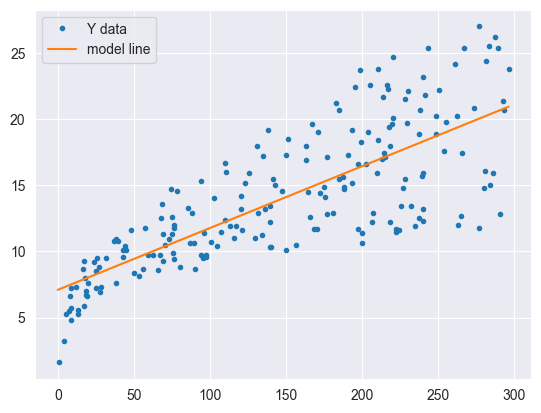

In [362]:
linear_regression(theta_0, theta_1, X)

Radio vs Sales

In [363]:
X = data['Radio']
theta_0 = 5
theta_1 = 0.299
lr = 0.0001
epocas = 1000
theta_0, theta_1 = gradient(X,Y,theta_0,theta_1,lr,epocas)

print("Final Theta 0 :", theta_0, " and final Theta 1: ", theta_1)

Theta 0 : 5.0002066564 Theta 1:  0.30169106993  Épocas:  0
Theta 0 : 5.000613688029275 Theta 1:  0.3068680625804697  Épocas:  1
Theta 0 : 5.001209010428959 Theta 1:  0.31413630039637747  Épocas:  2
Theta 0 : 5.0019756552383585 Theta 1:  0.3229416203696182  Épocas:  3
Theta 0 : 5.002893061096606 Theta 1:  0.3326125597888349  Épocas:  4
Theta 0 : 5.003938637789652 Theta 1:  0.34241147145141565  Épocas:  5
Theta 0 : 5.005089484571734 Theta 1:  0.35159067718607956  Épocas:  6
Theta 0 : 5.006324131853953 Theta 1:  0.3594493849924731  Épocas:  7
Theta 0 : 5.00762417367374 Theta 1:  0.365387036973761  Épocas:  8
Theta 0 : 5.0089756666733445 Theta 1:  0.3689490269445045  Épocas:  9
Theta 0 : 5.010370189089998 Theta 1:  0.3698613074554936  Épocas:  10
Theta 0 : 5.011805479142078 Theta 1:  0.3680512517716552  Épocas:  11
Theta 0 : 5.013285604214122 Theta 1:  0.3636531826824868  Épocas:  12
Theta 0 : 5.014820647961552 Theta 1:  0.35699814726366363  Épocas:  13
Theta 0 : 5.0164259391543915 Theta 1

MSE  =  10.324575692591694


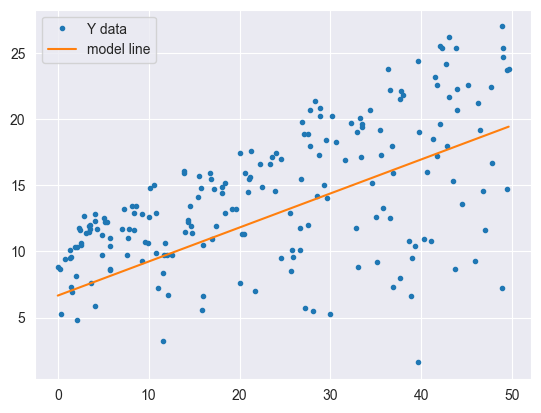

In [364]:
linear_regression(theta_0, theta_1, X)

Newspaper vs Sales

In [365]:
X = data['Newspaper']
theta_0 = 5
theta_1 = 0.3
lr = 0.0001
epocas = 1000
theta_0, theta_1 = gradient(X,Y,theta_0,theta_1,lr,epocas)

print("Final Theta 0 :", theta_0, " and final Theta 1: ", theta_1)

Theta 0 : 4.99998563 Theta 1:  0.28798400399999996  Épocas:  0
Theta 0 : 4.999993605111179 Theta 1:  0.2656408845578245  Épocas:  1
Theta 0 : 5.000092191703168 Theta 1:  0.2361109063246319  Épocas:  2
Theta 0 : 5.000371605812803 Theta 1:  0.20354415838575976  Épocas:  3
Theta 0 : 5.000931323940325 Theta 1:  0.1725169903583468  Épocas:  4
Theta 0 : 5.001866090523111 Theta 1:  0.14738850997159522  Épocas:  5
Theta 0 : 5.003252589643479 Theta 1:  0.13168762809862286  Épocas:  6
Theta 0 : 5.005138655125989 Theta 1:  0.12761684178482616  Épocas:  7
Theta 0 : 5.007536536244597 Theta 1:  0.1357425307267523  Épocas:  8
Theta 0 : 5.010421165981199 Theta 1:  0.15491531610251677  Épocas:  9
Theta 0 : 5.013733675344382 Theta 1:  0.1824316804814988  Épocas:  10
Theta 0 : 5.017389659583488 Theta 1:  0.21441412266079815  Épocas:  11
Theta 0 : 5.021291033946258 Theta 1:  0.24635639202925086  Épocas:  12
Theta 0 : 5.025339811885427 Theta 1:  0.27375713443379196  Épocas:  13
Theta 0 : 5.029451868294858 

MSE  =  22.58600267682721


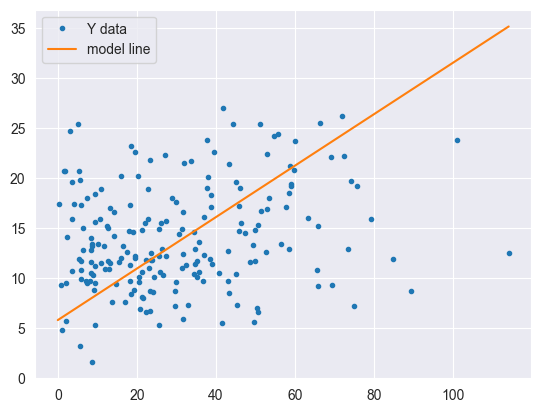

In [366]:
linear_regression(theta_0, theta_1, X)